<a href="https://colab.research.google.com/github/FREDERICO23/Machine-Learning-projects/blob/main/Eye_diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Load dataset from google drive

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [21]:
import keras
import tensorflow as tf
import numpy as np

print('Setup complete')

Setup complete


In [4]:
# Loader parameters

batch_size = 32
img_height =180
img_width =180


In [10]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
     '/content/drive/MyDrive/eye diseases',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 589 files belonging to 10 classes.
Using 472 files for training.


In [11]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/drive/MyDrive/eye diseases',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 589 files belonging to 10 classes.
Using 117 files for validation.


In [12]:
class_names = train_data.class_names
print(class_names)

['Presbyopia', 'blepharitis', 'cataracts', 'cellulitis', 'chalazion', 'conjunctivitis', 'endophthalmitis', 'glaucoma', 'keratitis', 'stye']


## Visualizing data

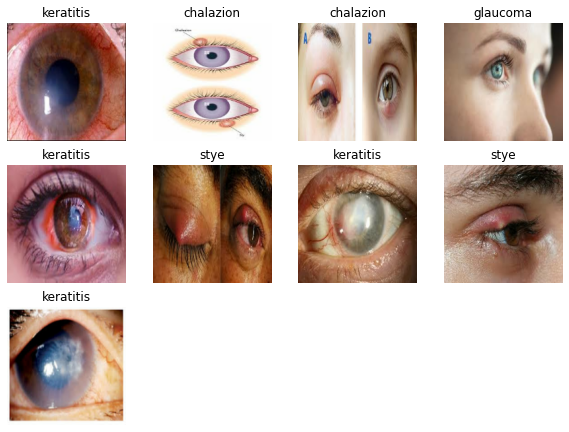

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

## Standardizing data

In [19]:
from tensorflow.keras import layers

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [24]:
normalized_data = train_data.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_data))
first_image = image_batch[0]

# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


## Dataset configuration

In [25]:
AUTOTUNE = tf.data.AUTOTUNE

train_data = train_data.cache().prefetch(buffer_size=AUTOTUNE)
val_data = val_data.cache().prefetch(buffer_size=AUTOTUNE)

## Training Model

In [39]:
num_classes = 10

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [40]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [42]:
model.fit(
    
    train_data,epochs=10,
    validation_split=0.0,
     validation_data=val_data,

)

Epoch 1/10
15/15 [==============================] - 17s 1s/step - loss: 1.3329 - accuracy: 0.4725 - val_loss: 1.4959 - val_accuracy: 0.4017
Epoch 2/10
15/15 [==============================] - 17s 1s/step - loss: 1.1569 - accuracy: 0.5487 - val_loss: 1.4115 - val_accuracy: 0.4444
Epoch 3/10
15/15 [==============================] - 17s 1s/step - loss: 0.9266 - accuracy: 0.6568 - val_loss: 1.4522 - val_accuracy: 0.4957
Epoch 4/10
15/15 [==============================] - 17s 1s/step - loss: 0.6969 - accuracy: 0.7458 - val_loss: 1.4817 - val_accuracy: 0.4530
Epoch 5/10
15/15 [==============================] - 17s 1s/step - loss: 0.5600 - accuracy: 0.8093 - val_loss: 1.7366 - val_accuracy: 0.4274
Epoch 6/10
15/15 [==============================] - 17s 1s/step - loss: 0.6165 - accuracy: 0.7966 - val_loss: 1.8846 - val_accuracy: 0.3590
Epoch 7/10
15/15 [==============================] - 17s 1s/step - loss: 0.7727 - accuracy: 0.7309 - val_loss: 1.7503 - val_accuracy: 0.3846
Epoch 8/10
15/15 [==